Task-1

Most Common Rating Range: 0.0
Average Number of Votes: 156.909747670401


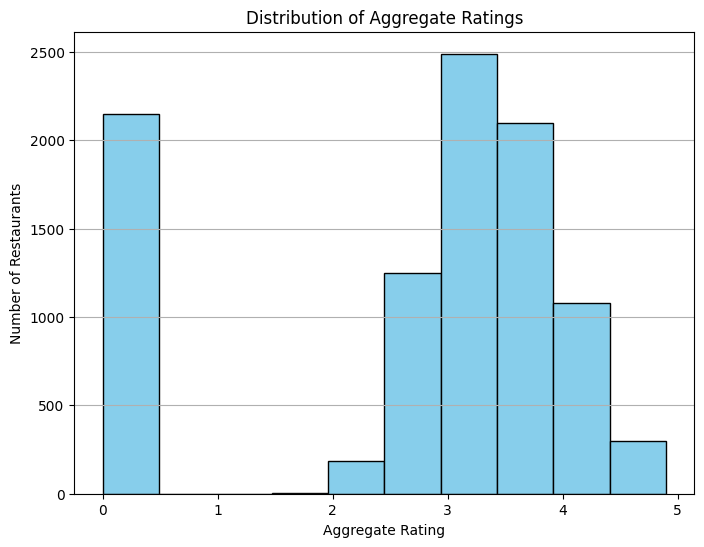

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Create a histogram or bar chart for distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.grid(axis='y')

# Determine the most common rating range
most_common_rating_range = data['Aggregate rating'].mode()[0]

# Calculate average number of votes received by restaurants
average_votes = data['Votes'].mean()

# Display results
print("Most Common Rating Range:", most_common_rating_range)
print("Average Number of Votes:", average_votes)

plt.show()


Task-2

In [2]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Extract the "Cuisines" and "Aggregate rating" columns
cuisine_ratings = data[['Cuisines', 'Aggregate rating']].dropna()

# Identify common cuisine combinations
cuisine_combinations = cuisine_ratings['Cuisines'].str.split(', ')
cuisine_combinations = cuisine_combinations.apply(lambda x: tuple(sorted(x)))  # Sort cuisines to avoid duplicate combinations
common_combinations = cuisine_combinations.value_counts().head(10)

# Analyze ratings for cuisine combinations
average_ratings_per_combination = cuisine_ratings.groupby('Cuisines')['Aggregate rating'].mean()

# Display results
print("Most Common Cuisine Combinations:")
print(common_combinations)

print("\nAverage Ratings for Cuisine Combinations:")
for combination, count in common_combinations.items():
    combination_str = ', '.join(combination)
    average_rating = average_ratings_per_combination[combination_str]
    print(f"Cuisines: {combination_str} | Count: {count} | Average Rating: {average_rating:.2f}")


Most Common Cuisine Combinations:
(North Indian,)                     936
(Chinese, North Indian)             616
(Mughlai, North Indian)             394
(Fast Food,)                        354
(Chinese,)                          354
(Chinese, Mughlai, North Indian)    306
(Cafe,)                             299
(Bakery,)                           218
(Bakery, Desserts)                  181
(Chinese, Fast Food)                159
Name: Cuisines, dtype: int64

Average Ratings for Cuisine Combinations:
Cuisines: North Indian | Count: 936 | Average Rating: 1.67
Cuisines: Chinese, North Indian | Count: 616 | Average Rating: 1.90
Cuisines: Mughlai, North Indian | Count: 394 | Average Rating: 2.09
Cuisines: Fast Food | Count: 354 | Average Rating: 2.12
Cuisines: Chinese | Count: 354 | Average Rating: 2.04
Cuisines: Chinese, Mughlai, North Indian | Count: 306 | Average Rating: 2.09
Cuisines: Cafe | Count: 299 | Average Rating: 2.89
Cuisines: Bakery | Count: 218 | Average Rating: 1.92
Cuisines

Task-3

In [3]:
import pandas as pd
import folium

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Create a map centered around a specific location (you can adjust these values)
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each restaurant's location
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

# Display the map
restaurant_map.save('restaurant_map.html')


Task-4

In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Group data by Restaurant Name to identify chains
chain_groups = data.groupby('Restaurant Name')

# Initialize lists to store chain statistics
chain_names = []
chain_avg_ratings = []
chain_total_votes = []
chain_num_locations = []

# Calculate chain statistics
for chain_name, group in chain_groups:
    num_locations = len(group)
    avg_rating = group['Aggregate rating'].mean()
    total_votes = group['Votes'].sum()

    chain_names.append(chain_name)
    chain_avg_ratings.append(avg_rating)
    chain_total_votes.append(total_votes)
    chain_num_locations.append(num_locations)

# Create a DataFrame for chain statistics
chain_stats = pd.DataFrame({
    'Chain Name': chain_names,
    'Average Rating': chain_avg_ratings,
    'Total Votes': chain_total_votes,
    'Number of Locations': chain_num_locations
})

# Display chain statistics
print("Chain Statistics:")
print(chain_stats.sort_values(by='Number of Locations', ascending=False))


Chain Statistics:
                                   Chain Name  Average Rating  Total Votes  \
1098                          Cafe Coffee Day        2.419277         2428   
2098                           Domino's Pizza        2.740506         6643   
6106                                   Subway        2.907937         6124   
2716                         Green Chick Chop        2.672549          964   
4077                               McDonald's        3.339583         5291   
...                                       ...             ...          ...   
2618                    Gian Ji Punjabi Dhaba        0.000000            0   
2617  Ghungroo Club & Bar - By Gautam Gambhir        3.800000          140   
2616                            Ghar Ki Handi        3.000000            6   
2615                             Ghar Ka Swad        0.000000            2   
7445                        �ukura��a Sofras۱        4.400000          296   

      Number of Locations  
1098             